# 1. Importing necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ipywidgets import interact,FloatSlider,Layout
from scipy.optimize import fsolve

# 2. Function definition (Name: Smoking) used for defining the system of ordinary differential equations.

In [3]:
def smoking(state,t,beta,mu,alpha,sigma,gamma,p):
    s,q,a = state  # Unpack the state vector.
    dsdt = beta*s*(1-s-q-a) - alpha*s*a + sigma*q*s - mu*s
    dqdt = alpha*s*a  - sigma*q*s - gamma*q - mu*q
    dadt = mu*p - mu*a + q*gamma
    return [dsdt, dqdt, dadt]

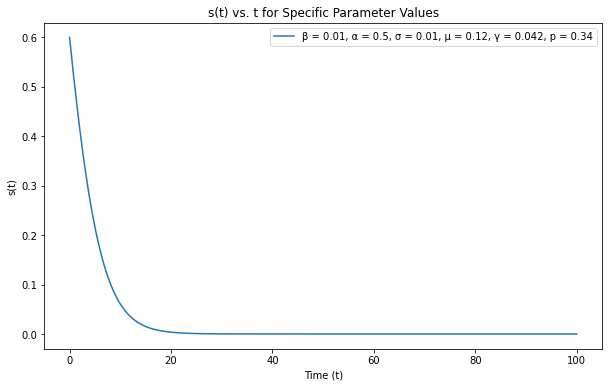

In [4]:
# Parameter values.
beta = 0.01
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Time points for simulation.
t = np.linspace(0, 100, 1000)

# Initial conditions.
state0 = [0.6, 0.2, 0.1]  # Initial values of s, q, and a.

# Simulate the system using the given parameters.
result = odeint(smoking, state0, t, args=(beta, mu, alpha, sigma, gamma, p))

# Extract s values from the result.
s_values = result[:, 0]

# Create a figure.
plt.figure(figsize=(10, 6))

# Plot s(t) vs t.
plt.plot(t, s_values, label=f'β = {beta}, α = {alpha}, σ = {sigma}, μ = {mu}, γ = {gamma}, p = {p}')

# Add labels and legend
plt.xlabel('Time (t)')
plt.ylabel('s(t)')
plt.legend()
plt.title('s(t) vs. t for Specific Parameter Values')

# Show the plot
plt.show()

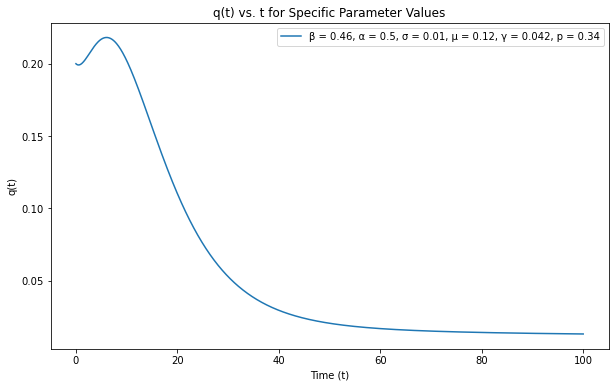

In [4]:
# Parameter values.
beta = 0.46
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Time points for simulation.
t = np.linspace(0, 100, 1000)

# Initial conditions.
state0 = [0.6, 0.2, 0.1]  # Initial values of s, q, and a.

# Simulate the system using the given parameters.
result = odeint(smoking, state0, t, args=(beta, mu, alpha, sigma, gamma, p))

# Extract q values from the result.
q_values = result[:, 1]

# Create a figure.
plt.figure(figsize=(10, 6))

# Plot q(t) vs t
plt.plot(t, q_values, label=f'β = {beta}, α = {alpha}, σ = {sigma}, μ = {mu}, γ = {gamma}, p = {p}')

# Add labels and legend.
plt.xlabel('Time (t)')
plt.ylabel('q(t)')
plt.legend()
plt.title('q(t) vs. t for Specific Parameter Values')

# Show the plot
plt.show()

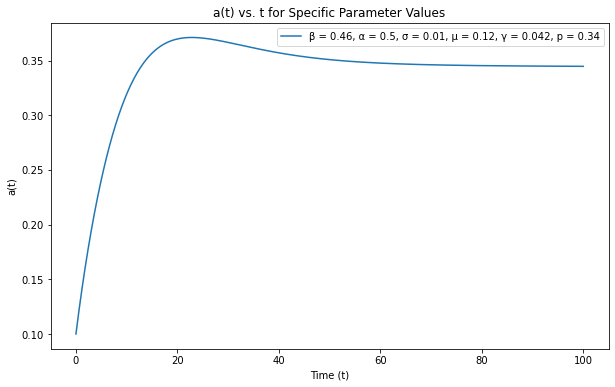

In [5]:
# Parameter values.
beta = 0.46
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Time points for simulation.
t = np.linspace(0, 100, 1000)

# Initial conditions.
state0 = [0.6, 0.2, 0.1]  # Initial values of s, q, and a.

# Simulate the system using the given parameters.
result = odeint(smoking, state0, t, args=(beta, mu, alpha, sigma, gamma, p))

# Extract a values from the result.
a_values = result[:, 2]

# Create a figure.
plt.figure(figsize=(10, 6))

# Plot a(t) vs t.
plt.plot(t, a_values, label=f'β = {beta}, α = {alpha}, σ = {sigma}, μ = {mu}, γ = {gamma}, p = {p}')

# Add labels and legend.
plt.xlabel('Time (t)')
plt.ylabel('a(t)')
plt.legend()
plt.title('a(t) vs. t for Specific Parameter Values')

# Show the plot
plt.show()

In [6]:
def smoking(state, beta, mu, alpha, sigma, gamma, p):
    s, q, a = state
    dsdt = beta * s * (1 - s - q - a) - alpha * s * a + sigma * q * s - mu * s
    dqdt = alpha * s * a - sigma * q * s - gamma * q - mu * q
    dadt = mu * p - mu * a + q * gamma
    return [dsdt, dqdt, dadt]

beta = 0.46
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Create a grid of (s, q) and (q, a) values
s_range = np.linspace(0, 1, 20)
q_range = np.linspace(0, 1, 20)
a_range = np.linspace(0, 1, 20)

# Create a meshgrid
Q, A = np.meshgrid(q_range, a_range)

# Calculate the vector field at each grid point
dsdt, dqdt, dadt = smoking([S, Q, A], beta, mu, alpha, sigma, gamma, p)

# Normalize the vectors for visualization
magnitude = np.sqrt(dsdt**2 + dqdt**2 + dadt**2)
dsdt /= magnitude
dqdt /= magnitude
dadt /= magnitude

# Plot the vector field in the (s, q) plane
plt.figure(figsize=(10, 6))
plt.quiver(S, Q, dsdt, dqdt, scale=15, color='b', alpha=0.7)
plt.xlabel('s')
plt.ylabel('q')
plt.title('Vector Field in (s, q) Plane')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plot the vector field in the (q, a) plane
plt.figure(figsize=(10, 6))
plt.quiver(Q, A, dqdt, dadt, scale=15, color='b', alpha=0.7)
plt.xlabel('q')
plt.ylabel('a')
plt.title('Vector Field in (q, a) Plane')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.quiver(S, A, dsdt, dadt, scale=15, color='b', alpha=0.7)
plt.xlabel('s')
plt.ylabel('a')
plt.title('Vector Field in (s, a) Plane')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

NameError: name 'S' is not defined

(<Figure size 432x288 with 3 Axes>,
 <AxesSubplot:title={'center':'Limit cycle'}, xlabel='X', ylabel='$\\dot{X}$'>)

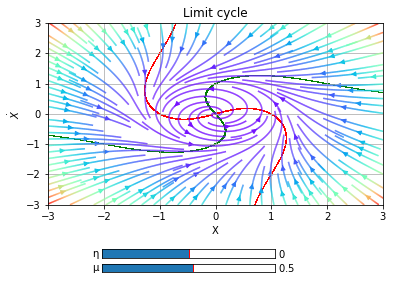

In [4]:
from phaseportrait import PhasePortrait2D

def dF(r, θ, *, μ=0.5,η=0):
    return μ*r*(1 - r*r), 1+η*θ


example = PhasePortrait2D(dF, [-3, 3], Density=2, Polar=True, Title='Limit cycle')
example.add_slider('μ', valinit=0.5)
example.add_slider('η', valinit=0.0)
example.add_nullclines()
example.plot()


C:\Users\SaiCharan Ritwik\Downloads\ANACONDA\anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


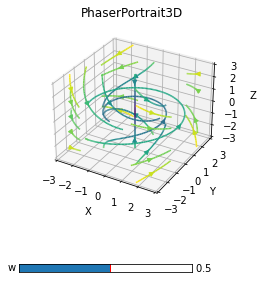

In [17]:
import matplotlib.pyplot as plt
import phaseportrait

# Include streamlines clases to change line styles
from phaseportrait.streamlines import *

def dF(x,y,z, *, w=1):
    return -y, x, -z

example = phaseportrait.PhasePortrait3D(dF, [-3, 3], MeshDim=6, maxLen=2500, deltat=0.1)

example.add_slider('w')
example.Title = "PhaserPortrait3D"

# Change from color proportional to speed to wind like plot
# Default callback is Streamlines_Velocity_Color_Gradient.
# example.streamplot_callback = Streamlines_Size_Gradient
example.plot(color='viridis', grid=True)
plt.show()


In [ ]:
#https://phaseportrait.github.io/reference/legacy/trajectory2d/

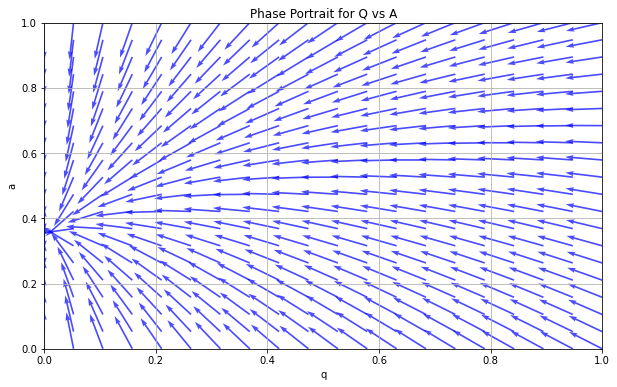

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def smoking(state, beta, mu, alpha, sigma, gamma, p):
    s, q, a = state
    dsdt = beta * s * (1 - s - q - a) - alpha * s * a + sigma * q * s - mu * s
    dqdt = alpha * s * a - sigma * q * s - gamma * q - mu * q
    dadt = mu * p - mu * a + q * gamma
    return [dsdt, dqdt, dadt]

beta = 0.01
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Create a grid of (q, a) values
q_range = np.linspace(0, 1, 20)
a_range = np.linspace(0, 1, 20)

# Create a meshgrid
Q, A = np.meshgrid(q_range, a_range)

# Initialize arrays to store vector field components
dqdt = np.zeros_like(Q)
dadt = np.zeros_like(A)

# Calculate the vector field at each grid point
for i in range(20):
    for j in range(20):
        state = [0, Q[i, j], A[i, j]]
        derivs = smoking(state, beta, mu, alpha, sigma, gamma, p)
        dqdt[i, j], dadt[i, j] = derivs[1], derivs[2]

# Normalize the vectors for visualization
magnitude = np.sqrt(dqdt**2 + dadt**2)
dqdt /= magnitude
dadt /= magnitude

# Create the phase portrait for Q vs A
plt.figure(figsize=(10, 6))
plt.quiver(Q, A, dqdt, dadt, scale=15, color='b', alpha=0.7)
plt.xlabel('q')
plt.ylabel('a')
plt.title('Phase Portrait for Q vs A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


<ipython-input-6-04322c863d29>:38: RuntimeWarning: invalid value encountered in divide
  dsdt /= magnitude
<ipython-input-6-04322c863d29>:39: RuntimeWarning: invalid value encountered in divide
  dqdt /= magnitude


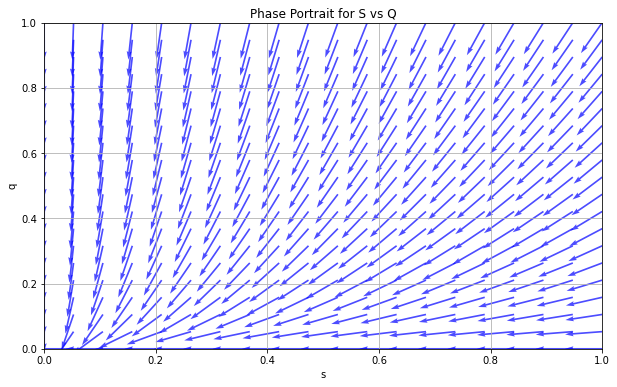

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def smoking(state, beta, mu, alpha, sigma, gamma, p):
    s, q, a = state
    dsdt = beta * s * (1 - s - q - a) - alpha * s * a + sigma * q * s - mu * s
    dqdt = alpha * s * a - sigma * q * s - gamma * q - mu * q
    dadt = mu * p - mu * a + q * gamma
    return [dsdt, dqdt, dadt]

beta = 0.01
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Create a grid of (s, q) values
s_range = np.linspace(0, 1, 20)
q_range = np.linspace(0, 1, 20)

# Create a meshgrid
S, Q = np.meshgrid(s_range, q_range)

# Initialize arrays to store vector field components
dsdt = np.zeros_like(S)
dqdt = np.zeros_like(Q)

# Calculate the vector field at each grid point
for i in range(20):
    for j in range(20):
        state = [S[i, j], Q[i, j], 0]
        derivs = smoking(state, beta, mu, alpha, sigma, gamma, p)
        dsdt[i, j], dqdt[i, j] = derivs[0], derivs[1]

# Normalize the vectors for visualization
magnitude = np.sqrt(dsdt**2 + dqdt**2)
dsdt /= magnitude
dqdt /= magnitude

# Create the phase portrait for S vs Q
plt.figure(figsize=(10, 6))
plt.quiver(S, Q, dsdt, dqdt, scale=15, color='b', alpha=0.7)
plt.xlabel('s')
plt.ylabel('q')
plt.title('Phase Portrait for S vs Q')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

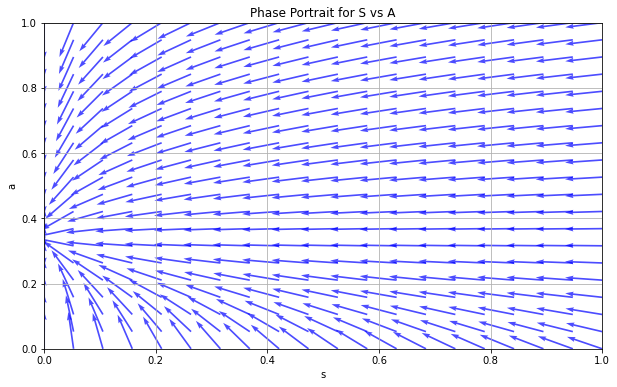

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def smoking(state, beta, mu, alpha, sigma, gamma, p):
    s, q, a = state
    dsdt = beta * s * (1 - s - q - a) - alpha * s * a + sigma * q * s - mu * s
    dqdt = alpha * s * a - sigma * q * s - gamma * q - mu * q
    dadt = mu * p - mu * a + q * gamma
    return [dsdt, dqdt, dadt]

beta = 0.01
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Create a grid of (s, a) values
s_range = np.linspace(0, 1, 20)
a_range = np.linspace(0, 1, 20)

# Create a meshgrid
S, A = np.meshgrid(s_range, a_range)

# Initialize arrays to store vector field components
dsdt = np.zeros_like(S)
dadt = np.zeros_like(A)

# Calculate the vector field at each grid point
for i in range(20):
    for j in range(20):
        state = [S[i, j], 0, A[i, j]]
        derivs = smoking(state, beta, mu, alpha, sigma, gamma, p)
        dsdt[i, j], dadt[i, j] = derivs[0], derivs[2]

# Normalize the vectors for visualization
magnitude = np.sqrt(dsdt**2 + dadt**2)
dsdt /= magnitude
dadt /= magnitude

# Create the phase portrait for S vs A
plt.figure(figsize=(10, 6))
plt.quiver(S, A, dsdt, dadt, scale=15, color='b', alpha=0.7)
plt.xlabel('s')
plt.ylabel('a')
plt.title('Phase Portrait for S vs A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()